In [1]:
import numpy as np
from graspy.simulations import sample_edges
from graspy.plot import heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import warnings
from simulations_corr_copy import sample_edges_corr, er_corr, sbm_corr

#### definite simulated P and Rho matrices

In [3]:
p = 0.5
r = 0.3
dim = 100
P = p * np.ones((dim,dim))
R = r * np.ones((dim,dim))

## tests for properties of sample_corr function

mean of revised probabilities of graph1 is  0.5000972222222222
mean of revised probabilities of graph2 is  0.4998058080808081


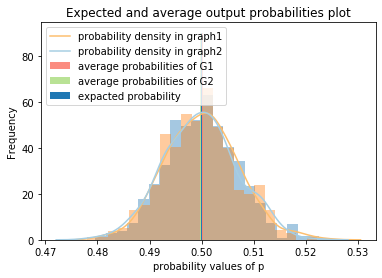

In [4]:
# return prob of G2 without diagnal elements
def test_sample_edges_corr_p(P, R, directed=False, loops=False):
    n = np.size(P,1)
    A, B = sample_edges_corr(P, R, directed=False, loops=False)
    prob1 = A.sum()/(n*(n-1))
    prob2 = B.sum()/(n*(n-1))
    return prob1, prob2

# show the PDF of 1 probability of G2
def density_sample_edges_corr_p(P, R, n):
    folder1=[]
    folder2=[]
    k1 = 0
    k2 = 0
    sum1 = 0
    sum2 = 0
    for i in range (n):
        k1, k2 = test_sample_edges_corr_p(P, R, directed=False, loops=False)
        folder1.append(k1)
        folder2.append(k2)
    folder1.sort()
    folder2.sort()
    m1 = np.mean(folder1)
    m2 = np.mean(folder2)
    print(f'mean of revised probabilities of graph1 is ',m1)
    print(f'mean of revised probabilities of graph2 is ',m2)

    x1 = p
    
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"probability density in graph1","color":"#fdbf6f"})
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"probability density in graph2","color":"#a6cee3"})
    plt.bar(m1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of G1')
    plt.bar(m2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of G2')
    plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()
density_sample_edges_corr_p(P, R, 800)

0.3002818181818186


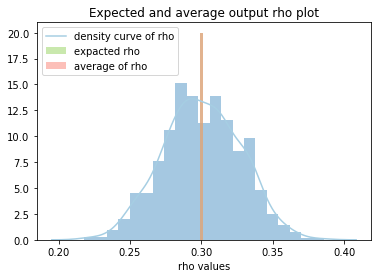

In [5]:
def test_sample_edges_corr_rho(P, R, pairs):
    folder2 = []
    h=0
    for i in range (pairs):
        n = np.size(P,1)
        g1, g2 = sample_edges_corr(P, R, directed=False, loops=False)
        P0 = np.copy(g1)
        add = g1+g2
        add[add!=2] = 0
        k = (add.sum()/2)/(n*(n-1))
        r = np.abs((k-p**2)/(p-p**2))
        folder2.append(r)
        h += r
    folder2.sort()
    avr = h/pairs
    print(avr)

    %matplotlib inline
    x2 = 0.3
    sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 20, width=0.002, alpha = 0.7, color='#b2df8a',label='expacted rho')
    plt.bar(avr, 20, width=0.002, alpha = 0.5, color='#fb8072',label='average of rho')
    plt.legend(loc='upper left')
    plt.title('Expected and average output rho plot')
    plt.show()

test_sample_edges_corr_rho(P, R, 800)

Expetation of the similarity is 
$p*[p+\rho*(1-p)] + (1-p)*[1-p*(1-\rho)]$.

If we output the simulated results from this function, 

we can see the results is close to what we expect:

In [6]:
# we can check the similarity between graph pairs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def test_sample_edges_corr_same(n):
    S = []
    judge = []
    dim = np.size(P,1)
    for i in range(n):
        A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
        judge = (A == B)+0
        S.append(judge)
    similarity = (np.sum(S)-dim*n)/(n*dim*(dim-1))
    return similarity
result = test_sample_edges_corr_same(1000)
m = p*(p+rho*(1-p)) + (1-p)*(1-p*(1-rho))
print(f'The calculated result of similarity is', result)
print(f'The expected result of similarity is', m)
print(f'The absolute difference is', (abs(result-m)/m)*100,'%')

The calculated result of similarity is 0.649659191919192
The expected result of similarity is 0.65
The absolute difference is 0.0524320124320081 %


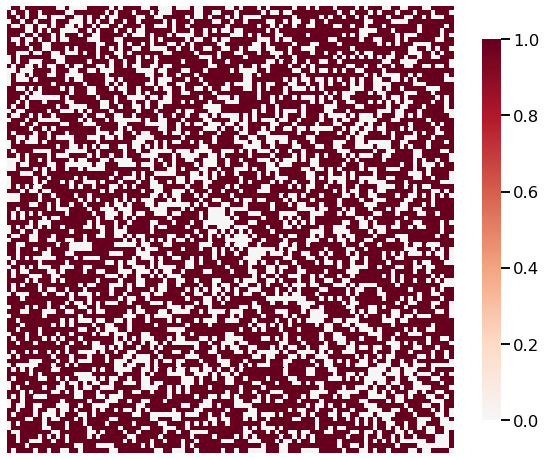

In [7]:
# show positions of the same values in both graphs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def show_sample_edges_corr_same():
    judge = []
    A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
    judge = (A == B)+0
    heatmap(judge - np.diag(np.diag(judge)))
show_sample_edges_corr_same()

## tests for properties of er_corr function

In [8]:
def test_er_corr_p(n, p, r, directed=False, loops=False):
    A, B = er_corr(n, p, r, directed=False, loops=False)
    prob1 = A.sum()/(n*(n-1))
    prob2 = B.sum()/(n*(n-1))
    return prob1, prob2

# show the PDF of 1 probability of G2
def density_er_corr_p(n, p, r, times):
    folder1=[]
    folder2=[]
    k1 = 0
    k2 = 0
    sum1 = 0
    sum2 = 0
    for i in range (times):
        k1, k2 = test_er_corr_p(n, p, r, directed=False, loops=False)
        folder1.append(k1)
        folder2.append(k2)
    folder1.sort()
    folder2.sort()
    m1 = np.mean(folder1)
    m2 = np.mean(folder2)
    print(f'mean of revised probabilities of graph1 is ',m1)
    print(f'mean of revised probabilities of graph2 is ',m2)

    x1 = p
    
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"probability density in graph1","color":"#fdbf6f"})
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"probability density in graph2","color":"#a6cee3"})
    plt.bar(m1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of G1')
    plt.bar(m2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of G2')
    plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()

mean of revised probabilities of graph1 is  0.5001502525252525
mean of revised probabilities of graph2 is  0.5000368686868687


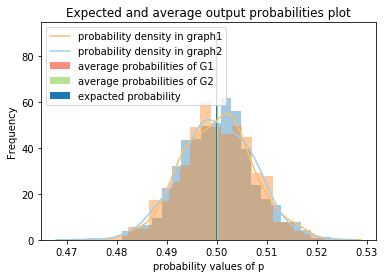

In [9]:
density_er_corr_p(100, 0.5, 0.01, 800)

mean of revised probabilities of graph1 is  0.5002042929292929
mean of revised probabilities of graph2 is  0.500029797979798


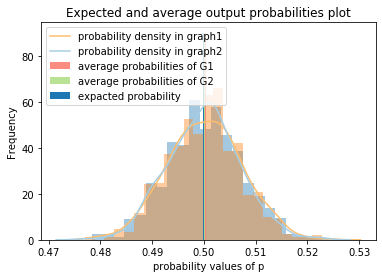

In [10]:
density_er_corr_p(100,0.5,0.5,800)

mean of revised probabilities of graph1 is  0.4992580808080808
mean of revised probabilities of graph2 is  0.49925075757575754


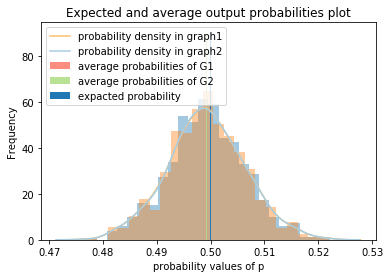

In [11]:
density_er_corr_p(100,0.5,0.999,800)

mean of revised probabilities of graph1 is  0.0
mean of revised probabilities of graph2 is  0.0


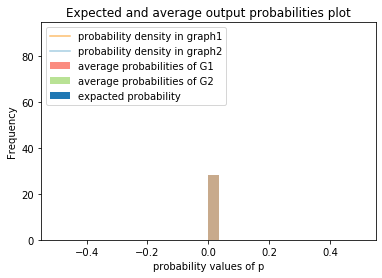

In [12]:
density_er_corr_p(100,0.00,0.3,800)

mean of revised probabilities of graph1 is  1.0
mean of revised probabilities of graph2 is  1.0


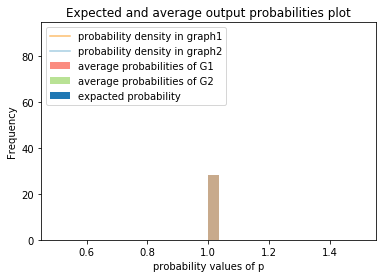

In [13]:
density_er_corr_p(100,1.00,0.3,800)

In [93]:
g1, g2 = er_corr(3, 0.5, 0.3, directed=False, loops=False)
print(g1)
g1[np.where(~np.eye(g1.shape[0], dtype=bool))]
# how we get rid of the diagonal elements

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([0., 0., 0., 0., 0., 0.])

In [3]:
def test_er_corr_rho(n, p, r):
    g1, g2 = er_corr(n, p, r, directed=False, loops=False)
    # since the diagonal elements are all 0 here
    # we get rif of them in case they would influence the results
    g1 = g1[np.where(~np.eye(g1.shape[0], dtype=bool))]
    g2 = g2[np.where(~np.eye(g2.shape[0], dtype=bool))]
    correlation = np.corrcoef(g1, g2)[0,1]
    return correlation
   
def density_er_corr_rho(n, p, r, pairs):
    folder2 = []
    h = 0
    correlation = 0
    for i in range (pairs):
        correlation = test_er_corr_rho(n, p, r)
        folder2.append(correlation)
        h += correlation
    
    folder2.sort()
    avr = h/pairs

    %matplotlib inline
    x2 = r
    sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 30, width=0.003, alpha = 0.8, color='#b2df8a',label='expacted value of rho')
    plt.bar(avr, 30, width=0.003, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()

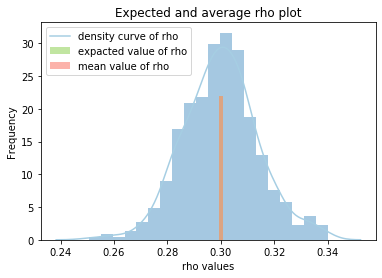

In [97]:
density_er_corr_rho(100,0.5,0.3,500)

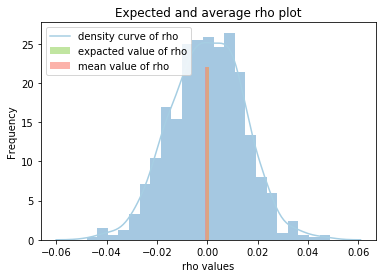

In [98]:
density_er_corr_rho(100,0.5,0.0,800)

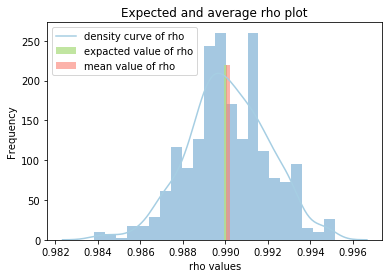

In [29]:
density_er_corr_rho(100,0.5,0.99,800)

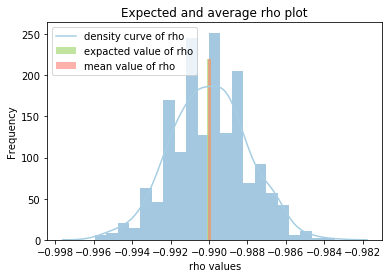

In [30]:
density_er_corr_rho(100,0.5,-0.99,800)

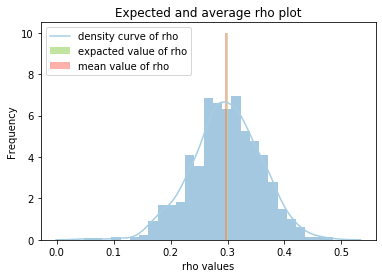

In [36]:
density_er_corr_rho(100,0.01,0.3,800)

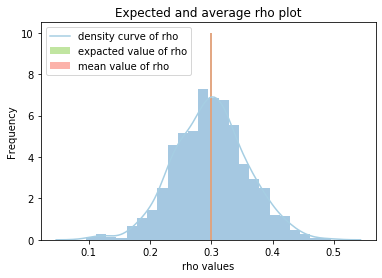

In [37]:
density_er_corr_rho(100,0.99,0.3,800)

## tests for properties of sbm_corr function

In [109]:
n = [100,100]
p = [[0.2, 0.6], [0.6, 0.2]]
r = 0.3

In [110]:
def test_sbm_corr_p(n, p, r, directed=False, loops=False):
    A, B = sbm_corr(n, p, r, directed=False, loops=False)
    a1, b1 = A[0:n[0],0:n[0]].copy(), A[0:n[0],n[0]:].copy()
    a2, b2 = B[0:n[0],0:n[0]].copy(), B[0:n[0],n[0]:].copy()
    pa1 = a1.sum()/(n[0]*(n[0]-1))
    pb1 = b1.sum()/(n[0]*n[1])
    pa2 = a2.sum()/(n[0]*(n[0]-1))
    pb2 = b2.sum()/(n[0]*n[1])
    return pa1, pb1, pa2, pb2

test_sbm_corr_p(n, p, r)

(0.19757575757575757, 0.6032, 0.2014141414141414, 0.6044)

In [111]:
# show the PDF of 1 probability of G1 and G2
def density_sbm_corr_p(times):
    foldera1=[]
    folderb1=[]
    foldera2=[]
    folderb2=[]
    ka1 = 0
    kb1 = 0
    ka2 = 0
    kb2 = 0
    suma1 = 0
    sumb1 = 0
    suma2 = 0
    sumb2 = 0

    for i in range (times):
        ka1, kb1, ka2, kb2 = test_sbm_corr_p(n, p, r, directed=False, loops=False)
        foldera1.append(ka1)
        folderb1.append(kb1)
        foldera2.append(ka2)
        folderb2.append(kb2)
    foldera1.sort()
    foldera2.sort()
    folderb1.sort()
    folderb2.sort()
    ma1 = np.mean(foldera1)
    ma2 = np.mean(foldera2)
    mb1 = np.mean(folderb1)
    mb2 = np.mean(folderb2)
    print(f'mean of revised probabilities of subpart1 of graph1 is ',ma1)
    print(f'mean of revised probabilities of subpart2 of graph1 is ',mb1)
    print(f'mean of revised probabilities of subpart1 of graph2 is ',ma2)
    print(f'mean of revised probabilities of subpart2 of graph2 is ',mb2)

    x1,x2 = p[0][0], p[0][1]
    
    sns.distplot(foldera1,axlabel='probability values of subpart1 p1', kde_kws={"label":"edge probability of subpart1 of graph1","color":"red"})
    sns.distplot(foldera2,axlabel='probability values of subpart2 p1', kde_kws={"label":"edge probability of subpart1 of graph2","color":"blue"})
    sns.distplot(folderb1,axlabel='probability values of subpart1 p2', kde_kws={"label":"edge probability of subpart2 of graph1","color":"green"})
    sns.distplot(folderb2,axlabel='probability values of subpart2 p2', kde_kws={"label":"edge probability of subpart2 of graph2","color":"#fdbf6f"})

    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()

mean of revised probabilities of subpart1 of graph1 is  0.2002513131313131
mean of revised probabilities of subpart2 of graph1 is  0.6001506
mean of revised probabilities of subpart1 of graph2 is  0.19976060606060606
mean of revised probabilities of subpart2 of graph2 is  0.5999729


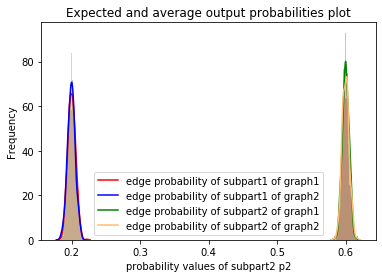

In [112]:
r = 0.3
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.20014242424242423
mean of revised probabilities of subpart2 of graph1 is  0.6000935999999999
mean of revised probabilities of subpart1 of graph2 is  0.1999030303030303
mean of revised probabilities of subpart2 of graph2 is  0.6000965


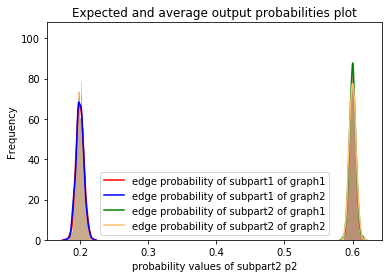

In [113]:
r = 0.01
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.19980424242424244
mean of revised probabilities of subpart2 of graph1 is  0.5998484
mean of revised probabilities of subpart1 of graph2 is  0.19977838383838384
mean of revised probabilities of subpart2 of graph2 is  0.5998391000000002


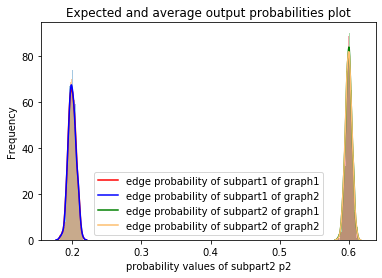

In [114]:
r = 0.99
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.0009828282828282828
mean of revised probabilities of subpart2 of graph1 is  0.9990084
mean of revised probabilities of subpart1 of graph2 is  0.0009812121212121213
mean of revised probabilities of subpart2 of graph2 is  0.9990087000000001


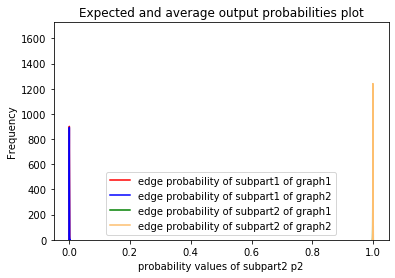

In [115]:
r = 0.99
p = [[0.001, 0.999], [0.999, 0.001]]
n = [100,100]
density_sbm_corr_p(1000)

From the above figures, we can see that the value of rho(range from 0.01 to 0.99) will not influence the behavior of this function.

In [2]:
n=[100,100]
p = [[0.4, 0.6], [0.6, 0.4]]
r = 0.3
def test_sbm_corr_rho(n, p, r, directed=False, loops=False):
    A, B = sbm_corr(n, p, r, directed=False, loops=False)
    pa1, pb1 = A[0:n[0],0:n[0]].copy(), A[0:n[0],n[0]:].copy()
    pa2, pb2 = B[0:n[0],0:n[0]].copy(), B[0:n[0],n[0]:].copy()
    pa1 = pa1[np.where(~np.eye(pa1.shape[0], dtype=bool))]
    pa2 = pa2[np.where(~np.eye(pa2.shape[0], dtype=bool))]
    pb1 = pb1.flatten()
    pb2 = pb2.flatten()
    m1 = np.corrcoef(pa1,pa2)[0,1]
    m2 = np.corrcoef(pb1,pb2)[0,1]
    return m1,m2
test_sbm_corr_rho(n, p, r, directed=False, loops=False)

(0.2996584618686419, 0.30119893582104207)

In [3]:
def density_sbm_corr_rho(pairs):
    folder = []
    h1 = 0
    m1 = 0
    h2 = 0
    m2 = 0
    for i in range (pairs):
        m1,m2 = test_sbm_corr_rho(n, p, r, directed=False, loops=False)
        folder.append(m1)
        folder.append(m2)
        h1 += m1
        h2 += m2
    folder.sort()
    avr1 = h1/pairs
    avr2 = h2/pairs
    avr = (avr1+avr2)/2

    %matplotlib inline
    x2 = r
    sns.distplot(folder,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 50, width=0.002, alpha = 0.8, color='blue',label='expacted value of rho')
    plt.bar(avr,50, width=0.002, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()

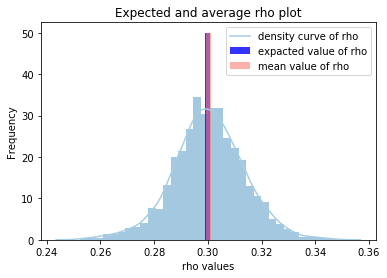

In [4]:
r = 0.3
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(800)

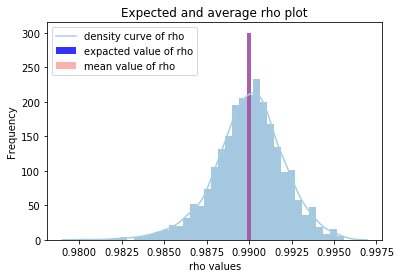

In [17]:
# if r is close to 1
r = 0.99
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(800)

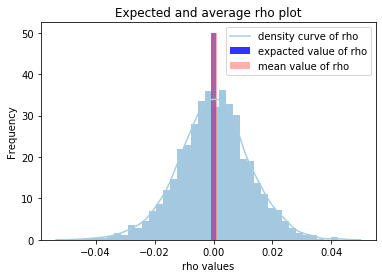

In [23]:
# if r is close to 0
r = 0.00
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(1000)

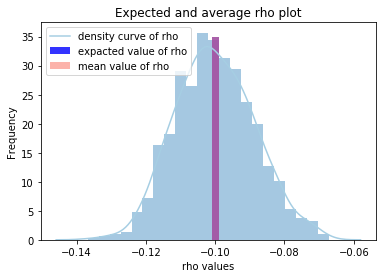

In [139]:
# if r is negative
r = -0.1
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(500)

In [5]:
r = -0.4
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(500)

ValueError: p + r * (1 - p) should be bigger than 0

#### The above cell shows that we should pay a ttention to the relationship between values of p and r. We have to make sure that p + r * (1 - p) and p * (1 - r) are bigger than 0.

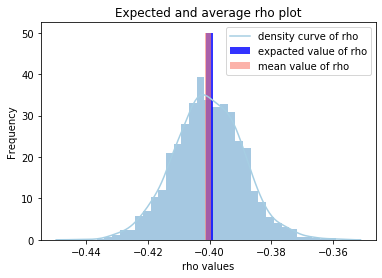

In [6]:
r = -0.4
p = [[0.5, 0.5], [0.5, 0.5]]
n = [100,100]
density_sbm_corr_rho(800)

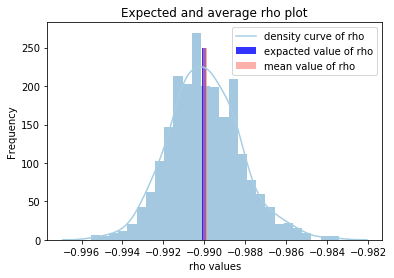

In [146]:
r = -0.99
p = [[0.5, 0.5], [0.5, 0.5]]
n = [100,100]
density_sbm_corr_rho(500)

## Test for Bear's rho_sbm codes

In [11]:
from bear_sbm import non_diagonal,rho_sbm

In [12]:
k=[100,100]
n=200
AL=[[0.2,0.6],[0.6,0.2]]
BL=AL
rho = 0.3
A, B = rho_sbm(rho, k, AL, BL, n)

In [17]:
def test_bear_sbm_p(rho, k, AL, BL, n):
    A, B = rho_sbm(rho, k, AL, BL, n)
    a1, b1 = A[0:k[0],0:k[0]].copy(), A[0:k[0],k[0]:].copy()
    a2, b2 = B[0:k[0],0:k[0]].copy(), B[0:k[0],k[0]:].copy()
    pa1 = a1.sum()/(k[0]*(k[0]-1))
    pb1 = b1.sum()/(k[0]*k[1])
    pa2 = a2.sum()/(k[0]*(k[0]-1))
    pb2 = b2.sum()/(k[0]*k[1])
    return pa1, pb1, pa2, pb2

test_bear_sbm_p(rho, k, AL, BL, n)

(0.0012121212121212121, 0.9993, 0.0014141414141414141, 0.9989)

In [18]:
# show the PDF of 1 probability of G1 and G2
def density_sbm_corr_p(times):
    foldera1=[]
    folderb1=[]
    foldera2=[]
    folderb2=[]
    ka1 = 0
    kb1 = 0
    ka2 = 0
    kb2 = 0
    suma1 = 0
    sumb1 = 0
    suma2 = 0
    sumb2 = 0

    for i in range (times):
        ka1, kb1, ka2, kb2 = test_bear_sbm_p(rho, k, AL, BL, n)
        foldera1.append(ka1)
        folderb1.append(kb1)
        foldera2.append(ka2)
        folderb2.append(kb2)
    foldera1.sort()
    foldera2.sort()
    folderb1.sort()
    folderb2.sort()
    ma1 = np.mean(foldera1)
    ma2 = np.mean(foldera2)
    mb1 = np.mean(folderb1)
    mb2 = np.mean(folderb2)
    print(f'mean of revised probabilities of subpart1 of graph1 is ',ma1)
    print(f'mean of revised probabilities of subpart2 of graph1 is ',mb1)
    print(f'mean of revised probabilities of subpart1 of graph2 is ',ma2)
    print(f'mean of revised probabilities of subpart2 of graph2 is ',mb2)

    x1,x2 = AL[0][0], AL[0][1]
    
    sns.distplot(foldera1,axlabel='probability values of subpart1 p1', kde_kws={"label":"edge probability of subpart1 of graph1","color":"red"})
    sns.distplot(foldera2,axlabel='probability values of subpart2 p1', kde_kws={"label":"edge probability of subpart1 of graph2","color":"blue"})
    sns.distplot(folderb1,axlabel='probability values of subpart1 p2', kde_kws={"label":"edge probability of subpart2 of graph1","color":"green"})
    sns.distplot(folderb2,axlabel='probability values of subpart2 p2', kde_kws={"label":"edge probability of subpart2 of graph2","color":"#fdbf6f"})

    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()

mean of revised probabilities of subpart1 of graph1 is  0.2020360606060606
mean of revised probabilities of subpart2 of graph1 is  0.6002121
mean of revised probabilities of subpart1 of graph2 is  0.20175212121212122
mean of revised probabilities of subpart2 of graph2 is  0.5998287


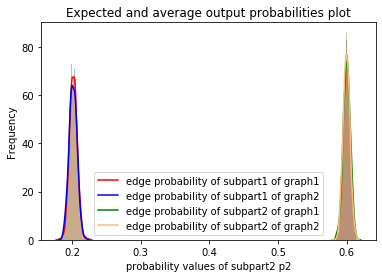

In [160]:
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.0010102020202020202
mean of revised probabilities of subpart2 of graph1 is  0.9990038000000001
mean of revised probabilities of subpart1 of graph2 is  0.0009951515151515153
mean of revised probabilities of subpart2 of graph2 is  0.9990045


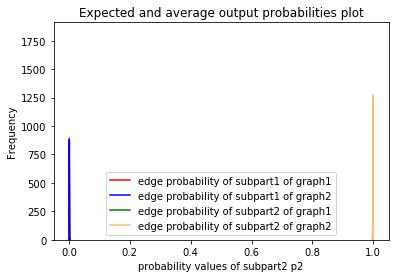

In [19]:
k=[100,100]
n=200
AL=[[0.001,0.999],[0.999,0.001]]
BL=AL
rho = 0.3
density_sbm_corr_p(1000)

In [20]:
def test_sbm_bear_rho(rho, k, AL, BL, n):
    A, B = rho_sbm(rho, k, AL, BL, n)
    pa1, pb1 = A[0:k[0],0:k[0]].copy(), A[0:k[0],k[0]:].copy()
    pa2, pb2 = B[0:k[0],0:k[0]].copy(), B[0:k[0],k[0]:].copy()
    pa1 = pa1[np.where(~np.eye(pa1.shape[0], dtype=bool))]
    pa2 = pa2[np.where(~np.eye(pa2.shape[0], dtype=bool))]
    pb1 = pb1.flatten()
    pb2 = pb2.flatten()
    l1 = np.corrcoef(pa1,pa2)[0,1]
    l2 = np.corrcoef(pb1,pb2)[0,1]
    return l1,l2
test_sbm_bear_rho(rho, k, AL, BL, n)

(0.37697023990326095, 0.15758385875854974)

In [21]:
def density_bear_sbm_rho(pairs):
    folder1 = []
    folder2 = []
    folder = []
    h1 = 0
    l1 = 0
    h2 = 0
    l2 = 0
    for i in range (pairs):
        l1,l2 = test_sbm_bear_rho(rho, k, AL, BL, n)
        folder.append(l1)
        folder.append(l2)
        h1 += l1
        h2 += l2
    folder.sort()
    avr1 = h1/pairs
    avr2 = h2/pairs
    avr = (avr1+avr2)/2

    %matplotlib inline
    x2 = rho
    sns.distplot(folder,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 35, width=0.0015, alpha = 0.8, color='blue',label='expacted value of rho')
    plt.bar(avr, 35, width=0.0015, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()

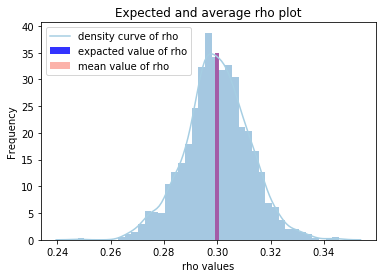

In [14]:
k=[100,100]
n=200
AL=[[0.3,0.6],[0.6,0.3]]
BL=AL
rho = 0.3
density_bear_sbm_rho(800)

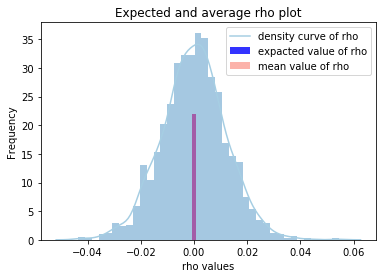

In [11]:
rho = 0.0
density_bear_sbm_rho(800)

In [22]:
rho = -0.5
density_bear_sbm_rho(800)

ValueError: p < 0

Here we can see that Bear's codes don't limit the relation between values of p and rho.